In [68]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [69]:
load_dotenv() 
Api_key = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(
    model="openai/gpt-4o-mini",
    base_url="https://openrouter.ai/api/v1",
    api_key= Api_key
)


In [70]:
class Blog_gen_State(TypedDict):
    topic: str
    outline: str
    blog_content: str
    Evaluate : str

In [71]:
def gen_outline(state : Blog_gen_State) -> Blog_gen_State:
    topic = state["topic"] 
    outline = model.invoke(f"Generate a detailed outline for a blog on the topic: {topic}").content
    state["outline"] = outline
    return state


In [72]:
def gen_blog(state : Blog_gen_State) -> Blog_gen_State:
    outline = state["outline"] 
    blog_content = model.invoke(f"Write a comprehensive blog based on the following outline in points : {outline}").content
    state["blog_content"] = blog_content
    return state

In [73]:
# bASED ON OUTLINE rATE THE BLOG AND GENERATE A SCORE <- wiork to do 
def Evaluate(state : Blog_gen_State) -> Blog_gen_State:
    outline = state['outline']
    blog_content = state["blog_content"]
    rating = f"Rate the following blog content {blog_content} based on the outline {outline} provided on a scale of 1 to 10 , also justify your rating in 50 words"
    rate_blog = model.invoke(rating).content
    state["Evaluate"] = rate_blog
    return state 

In [74]:
graph = StateGraph(Blog_gen_State)

#Nodes 
graph.add_node("gen_outline",gen_outline)
graph.add_node("gen_blog",gen_blog)
graph.add_node("Evaluate",Evaluate)

# Edges 
graph.add_edge(START,"gen_outline")
graph.add_edge("gen_outline","gen_blog")
graph.add_edge("gen_blog","Evaluate")
graph.add_edge("Evaluate",END)

workflow = graph.compile()

In [76]:
initial_state = {
    "topic" : "The impact of artificial intelligence on modern healthcare"
}
final_stage = workflow.invoke(initial_state)
# print(final_stage["outline"])
# print("\n")
# print(final_stage["blog_content"])
print(final_stage["Evaluate"])

Rating: 9/10

The blog content is well-structured, informative, and covers essential aspects of AI in modern healthcare, including its applications, benefits, and challenges. It effectively highlights advancements while addressing ethical considerations. The inclusion of references enhances credibility. A minor improvement could be more specific examples or case studies to illustrate points further.


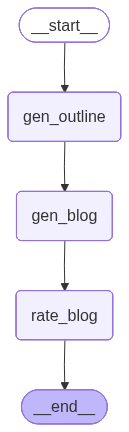

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())